In [ ]:
# Create a stacked bar graph of the count of companies grouped by countries which stacks companies by industry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [7]:
import numpy as np

In [2]:
country_data = pd.read_csv('../data/companies.csv')

In [3]:
country_counts = country_data['Country'].value_counts()

country_counts.head(10)

United States     457
Germany           147
United Kingdom    128
France             83
Japan              76
Switzerland        58
Finland            55
China              52
Netherlands        50
Poland             41
Name: Country, dtype: int64

In [4]:
top_countries = country_counts.head(10).index.tolist()

focused_data = country_data[country_data['Country'].isin(top_countries)]

In [6]:
# This code groups countries and produces a count of how many companies there are in each industry.

country_industries = focused_data.groupby('Country')['Industry'].value_counts()
print(country_industries)

Country        Industry              
China          Industrials               14
               Financials                10
               Information Technology     8
               Energy                     5
               Consumer Discretionary     4
                                         ..
United States  Financials                28
               Materials                 18
               Energy                    12
               NGO                        8
               Real Estate                5
Name: Industry, Length: 104, dtype: int64


In [14]:
# Attempting to make stacked bar chart here:

# Reshape the data for plotting
stacked_data = country_industries.unstack()


<Figure size 1200x600 with 0 Axes>

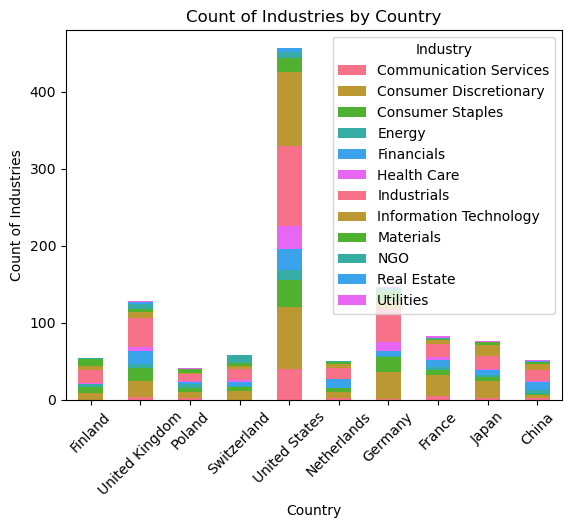

In [23]:
# Plot the stacked bar graph
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
stacked_data.plot(kind='bar', stacked=True)
plt.title('Count of Industries by Country')
plt.xlabel('Country')
plt.ylabel('Count of Industries')
plt.xticks(rotation=45)
plt.legend(title='Industry')

plt.show()

<Figure size 1200x600 with 0 Axes>

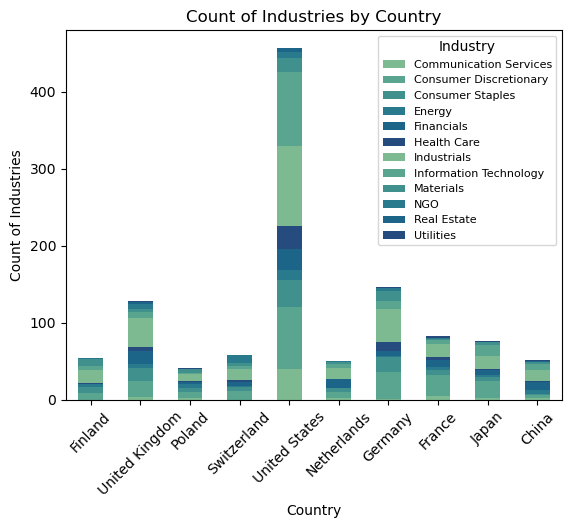

In [32]:
# Trying the above with a less garish color scheme:

plt.figure(figsize=(12, 6))
sns.set_palette("crest")
stacked_data.plot(kind='bar', stacked=True)
plt.title('Count of Industries by Country')
plt.xlabel('Country')
plt.ylabel('Count of Industries')
plt.xticks(rotation=45)
plt.legend(title='Industry', prop={'size': 8})

plt.show()

#### This looks marginally better, but the division of colors somewhat misses the point, if anything this is best understood as a proof of concept to me.